### Exercise 6

In [2]:
%matplotlib inline
#%matplotlib osx
from matplotlib import pyplot as plt
import numpy as np
import math

### System of Non-Linear Equations.

Consider
$$x^2 + xy = 10$$
$$y + 3 xy^2 = 57$$

1) Write it in the form of
$$u(x,y) = 0$$
$$v(x,y) = 0$$

In [26]:
def u(x, y):
    return x**2 + x*y - 10

def v(x, y):
    return y + 3*x*y**2 - 57

def cost(arg):
    x,y = arg
    return u(x,y)**2 + v(x,y)**2

from scipy.optimize import minimize

res = minimize(cost, [5, 5])
print(res)

cost(res.x)

      fun: 1.7630357734702014e-13
 hess_inv: array([[ 0.0163336 , -0.01205161],
       [-0.01205161,  0.00925601]])
      jac: array([2.55629791e-08, 3.08569776e-08])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 20
     njev: 25
   status: 0
  success: True
        x: array([2.00000006, 2.99999995])


1.7630357734702014e-13

In [19]:
def u(x, y):
    return x**2 + x*y - 10


def v(x, y):
    return y + 3*x*y**2 - 57

2) Let us visualize it by making 3d plot. Despite looking really cool it doesn't tell much.

Text(0.5, 0.92, 'v(x,y)')

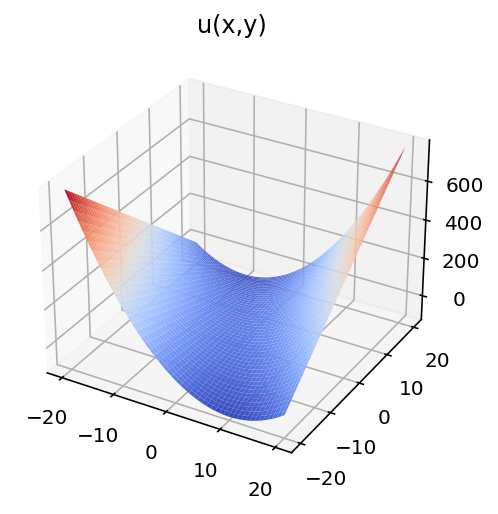

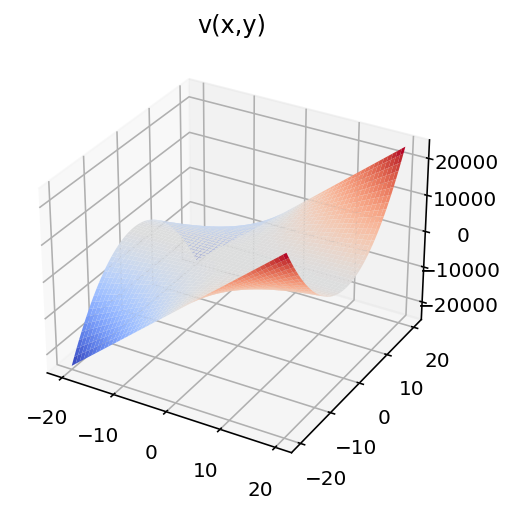

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

3) Contour plot.

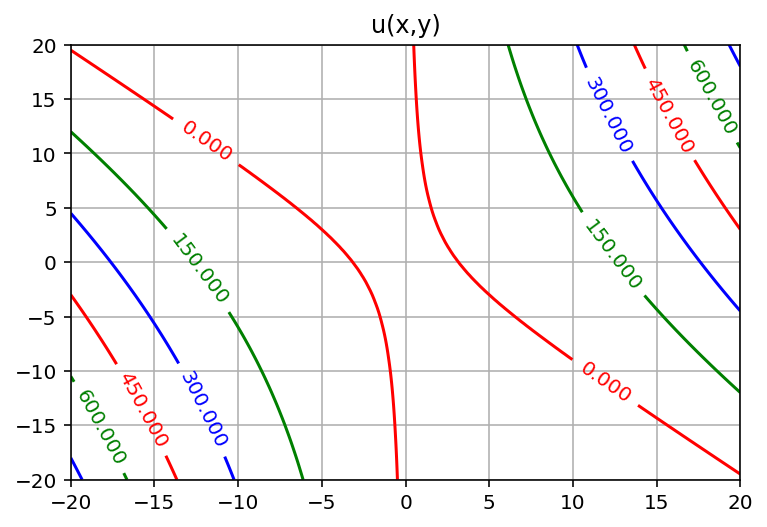

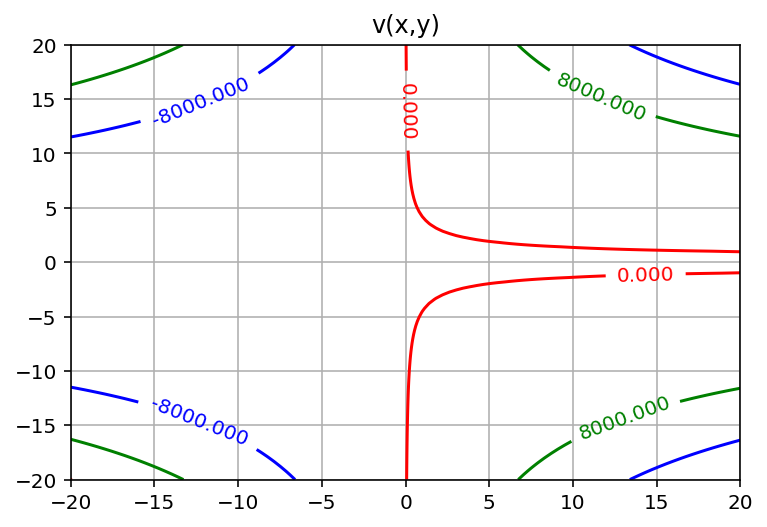

In [5]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

3) Which lines are we interested in?

4)Let's overlay them on top of each other.

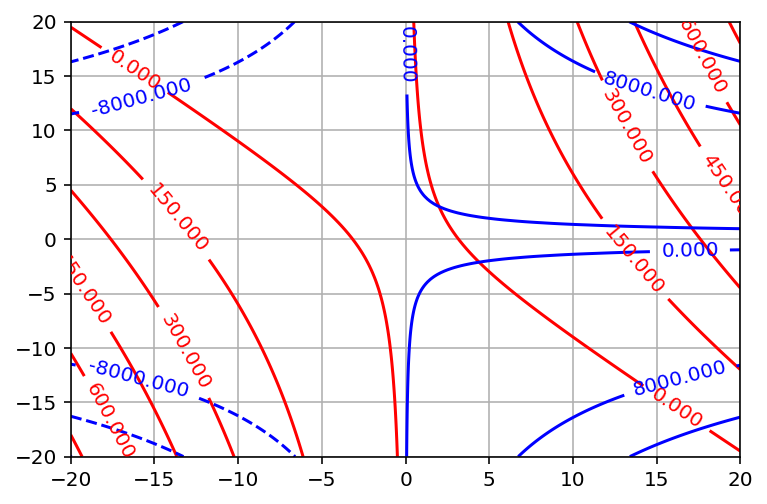

In [6]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

5) Where (approximately) are the solutions to $u(x,y)=0$ and $v(x,y)=0$

### Newton's Method (>1D)

1) What matrix equation you need to solve to find the next guess ($x_{n+1}, y_{n+1}$)?

In [16]:
def u(x, y):
    return x**2 + x*y - 10


def v(x, y):
    return y + 3*x*y**2 - 57


#numerical derivative works too

def ux(x, y):
    return 2*x + y


def uy(x, y):
    return x


def vx(x, y):
    return 3*y**2


def vy(x, y):
    return 1 + 6*x*y

def jacobian(x,y):
    return np.array([
        [ux(x,y), uy(x,y)],
        [vx(x,y), vy(x,y)]
    ])
jacobian(0.,5.)

array([[ 5.,  0.],
       [75.,  1.]])

2)Where should you start your guess ($x_0, y_0$)?

In [17]:
def newton_2d(x0, y0, n):
    x, y = x0, y0
    for i in range(n):
        c = np.array([-u(x,y), -v(x,y)])
        A = jacobian(x,y)
        print(c)
        dx, dy = np.linalg.solve(A, c)
        x = x+dx
        y = y+dy
        print(x,y, u(x,y), v(x,y))
    return x,y

newton_2d(5,-5, 10)

[  10 -313]
4.933035714285714 -2.9330357142857144 -0.1339285714285694 67.37922112378713
[  0.13392857 -67.37922112]
4.488744304382961 -2.281465977110171 -0.09209198026631427 10.811447961536217
[  0.09209198 -10.81144796]
4.398264318849001 -2.1259775010942623 -0.005881967278392963 0.511588230401415
[ 0.00588197 -0.51158823]
4.393756032377844 -2.117802748483644 -1.6529479694327165e-05 0.0013509653340406658
[ 1.65294797e-05 -1.35096533e-03]
4.39374419337169 -2.117781014866978 -1.1714540448792832e-10 9.495686015270621e-09
[ 1.17145404e-10 -9.49568602e-09]
4.393744193288599 -2.1177810147141836 3.552713678800501e-15 7.105427357601002e-15
[-3.55271368e-15 -7.10542736e-15]
4.393744193288598 -2.1177810147141836 -5.329070518200751e-15 0.0
[ 5.32907052e-15 -0.00000000e+00]
4.393744193288599 -2.1177810147141836 3.552713678800501e-15 7.105427357601002e-15
[-3.55271368e-15 -7.10542736e-15]
4.393744193288598 -2.1177810147141836 -5.329070518200751e-15 0.0
[ 5.32907052e-15 -0.00000000e+00]
4.3937441932

(4.393744193288599, -2.1177810147141836)

3) Find ($x_1, y_1$)

4)Find ($x_2, y_2$)

5)Write a program to do what you just did and find  $(x_5, y_5)$? Plot to verify. (Just add plt.plot([x],[y])). You may use np.linalg.solve.

6) Find the other solution.

7) Does it guarantee to converge to the right answer?

8) Implement np.linalg.solve using gaussian elimination.